<a href="https://colab.research.google.com/github/AyushSaini0808/Build_NN/blob/main/Build_NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***BUILDING A NEURAL NETWORK FROM SCRATCH***

---



This notebook focuses on building a neural network entirely from the scratch without using tensorflow or keras for training the dataset but rather using numpy and basic algebra

In [ ]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_data = pd.read_csv("/content/train.csv")
train_data = np.array(training_data)
m, n = train_data.shape
np.random.shuffle(train_data)  # shuffle before splitting into dev and training sets

dev_data = train_data[0:1000].T
Y_dev = dev_data[0]
X_dev = dev_data[1:n]
X_dev = X_dev / 255.

train_data = train_data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape
print(Y_train)
print(X_train[0].shape)

[0 0 0 ... 7 2 2]
(41000,)


In [ ]:
print(Y_train)

[0 0 0 ... 7 2 2]


In [ ]:
print(X_train[0].shape)

(41000,)


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((int(Y.size), int(Y.max() + 1)))
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1 # Cast Y to integers when using as indices
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,0.25,500)

Iteration:  0
[7 0 7 ... 7 1 7] [0 0 0 ... 7 2 2]
0.114
Iteration:  10
[0 0 0 ... 7 1 7] [0 0 0 ... 7 2 2]
0.31034146341463414
Iteration:  20
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.45253658536585367
Iteration:  30
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.559
Iteration:  40
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.6194390243902439
Iteration:  50
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.66
Iteration:  60
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.6907073170731707
Iteration:  70
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7158536585365853
Iteration:  80
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7060975609756097
Iteration:  90
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7344390243902439
Iteration:  100
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7545121951219512
Iteration:  110
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7690731707317073
Iteration:  120
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7814146341463415
Iteration:  130
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7907804878048781
Iteration:  140
[0 0 0 ... 7 1 2] [0 0 0 ... 7 2 2]
0.7

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


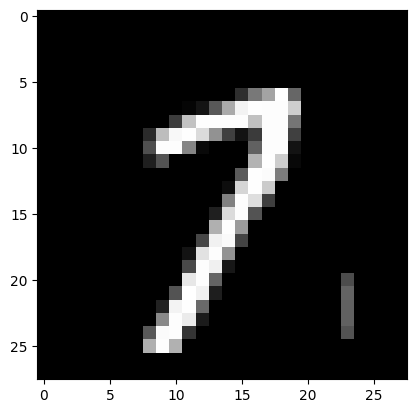

Prediction:  [3]
Label:  3


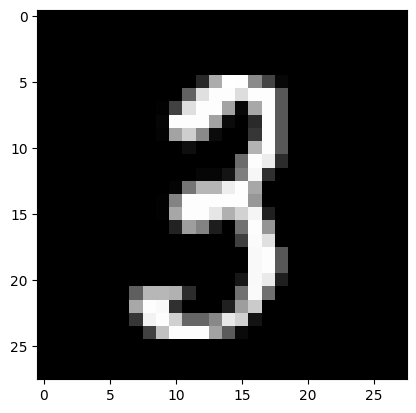

Prediction:  [7]
Label:  7


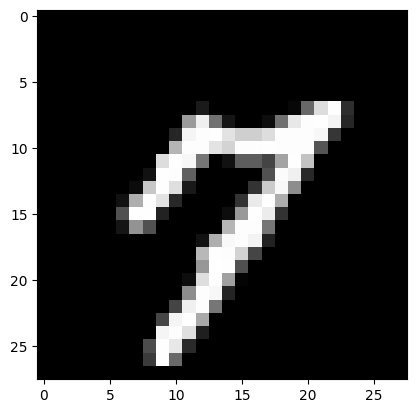

Prediction:  [5]
Label:  5


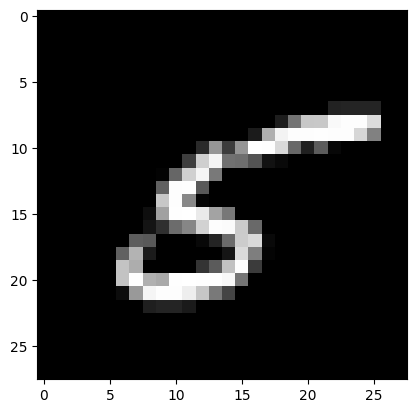

In [ ]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(28, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 8 0 2 1 6 3 2 9 0 7 5 7 9 3 6 2 9 4 2 9 7 4 1 7 3 6 2 5 9 8 6 0 4 3 7
 7 5 5 6 7 0 2 6 3 8 4 5 8 8 4 2 1 5 0 0 7 1 9 6 4 1 9 0 3 8 7 7 7 3 0 1 5
 6 3 1 9 1 3 9 1 0 9 6 7 0 8 1 7 8 1 3 8 5 9 1 7 0 0 0 9 1 9 8 1 0 8 0 0 3
 8 1 2 8 5 7 0 3 2 1 7 4 3 8 1 5 0 7 8 1 7 1 3 2 9 5 9 3 2 7 7 6 0 5 7 4 9
 5 4 2 1 6 9 1 3 7 7 1 9 5 2 8 1 3 2 1 6 5 1 9 6 2 9 2 3 8 3 4 6 2 4 2 4 3
 7 3 3 8 4 2 2 9 2 9 7 2 4 0 5 2 1 4 2 0 3 9 1 2 2 6 2 4 7 7 6 8 2 8 4 9 2
 8 9 9 7 1 6 8 3 9 0 2 7 1 7 4 2 5 4 3 3 1 7 4 6 1 0 6 4 8 2 7 0 2 2 5 4 5
 1 9 4 9 1 0 2 3 3 6 3 3 1 8 7 2 4 0 7 3 2 3 9 8 7 5 7 0 6 3 6 2 2 1 2 7 4
 6 1 9 7 7 4 4 0 5 6 4 6 9 5 0 3 8 1 8 0 8 6 5 9 2 1 2 8 4 9 2 4 2 6 5 8 8
 1 5 9 8 0 3 7 2 0 9 4 4 4 8 8 0 1 8 7 1 0 1 4 3 8 5 0 7 3 0 5 4 0 8 7 1 1
 2 1 7 3 3 1 6 8 2 5 3 3 3 8 6 9 5 2 3 8 6 1 7 5 1 2 5 9 5 8 3 8 1 4 0 7 0
 1 5 7 1 1 8 7 6 5 7 3 6 3 9 0 2 0 2 3 7 6 5 0 3 5 0 5 0 4 1 9 8 5 5 0 5 8
 2 7 0 9 1 6 6 7 5 2 0 1 9 5 8 5 0 9 3 3 1 8 6 4 4 9 1 6 9 8 6 8 0 4 4 1 5
 1 6 6 0 1 4 8 4 0 6 2 1 

0.904